In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_entropy_from_data(data):
    return np.array(data["inactive"]["entropy"]["shannonEntropy"])

def get_data(file):
    return json.load(open(file))

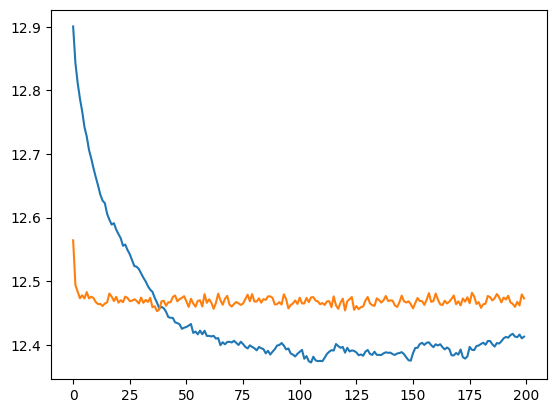

In [3]:
plt.plot(get_entropy_from_data(get_data("/home/tom/Programming/SCONE/cmfd_workflow/perfect_cmfd/output_real.json"))[:200])
plt.plot(get_entropy_from_data(get_data("/home/tom/Programming/SCONE/cmfd_workflow/perfect_cmfd/output.json"))[:200])


In [4]:
data_popsy = get_data("/home/tom/Programming/SCONE/InputFiles/output.json")
popsy_flux_map = np.array(data_popsy["active"]["fluxMap"]["Res"])

FileNotFoundError: [Errno 2] No such file or directory: '/home/tom/Programming/SCONE/InputFiles/output.json'

In [ ]:
data_slab = get_data("/home/tom/Programming/SCONE/InputFiles/output_very_large_no_accel.json")
slab_flux_map = np.array(data_slab["active"]["fluxMap"]["Res"])

Text(0.5, 1.0, 'Total flux')

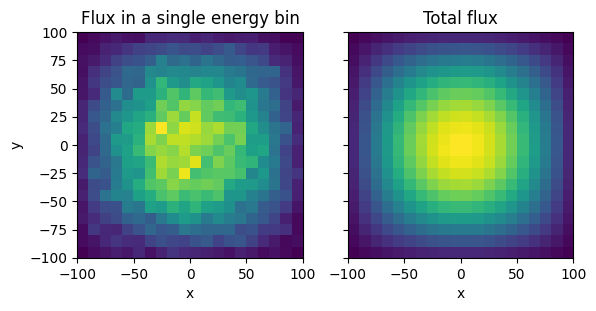

In [ ]:
total_flux = np.sum(slab_flux_map[10, :, :, :, 0, 0], axis=2)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

energy_bin = np.array(data_slab["active"]["fluxMap"]["EnergyBounds"]).T[4]

img = ax1.imshow(slab_flux_map[10, :, :, 4, 0, 0], extent=[-100, 100, -100, 100])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title(f"Flux in a single energy bin")

img = ax2.imshow(total_flux, extent=[-100, 100, -100, 100])
ax2.set_xlabel("x")
ax2.set_title("Total flux")

Text(0, 0.5, 'y')

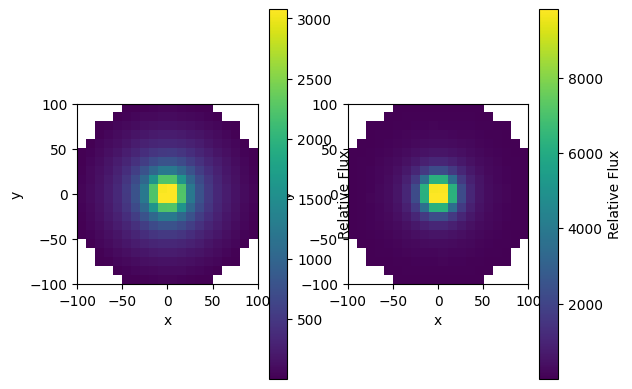

In [ ]:
total_flux = np.sum(popsy_flux_map[10, :, :, :, 0, 0], axis=2)
total_flux[total_flux == 0] = np.nan

fig, (ax1, ax2) = plt.subplots(1, 2)

img = ax1.imshow(total_flux, extent=[-100, 100, -100, 100])
fig.colorbar(img, label="Relative Flux")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

average_energy = np.zeros(total_flux.shape)
for index, (energy_lower, energy_upper) in enumerate(zip(*data_popsy["active"]["fluxMap"]["EnergyBounds"])):
    average_bin_energy = (energy_upper + energy_lower) / 2
    average_energy += popsy_flux_map[10, :, :, index, 0, 0] * average_bin_energy

average_energy[average_energy == 0] = np.nan

img = ax2.imshow(average_energy, extent=[-100, 100, -100, 100])
fig.colorbar(img, label="Relative Flux")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

In [ ]:
energy = 7
plt.imshow(flux_map[10, :, :, energy, 0, 0], extent=[-100, 100, -100, 100])
plt.colorbar(label="Relative Flux")
plt.xlabel("x")
plt.ylabel("y")

IndexError: index 7 is out of bounds for axis 3 with size 7